## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer=keras.layers.Input(input_shape)
    for i,n in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=n,activation='relu',name='hidden_layer_'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n,activation='relu',name='hidden_layer_'+str(i+1))(x)
    output_layer=keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[output_layer])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 256
momentem=[0.5,0.8]


In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in momentem:
    for j in [True,False]:
        keras.backend.clear_session()
        print( "exp-mom-{}, nesterov={}".format(str(i),str(j)))
        model=build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer=keras.optimizers.SGD(lr=LEARNING_RATE,nesterov=j,momentum=i)
        model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
        
        model.fit(x_train,y_train,epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test,y_test),
                 shuffle=True)
            # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = "exp-mom-{}, nesterov={}".format(str(i),str(j))
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

exp-mom-0.5, nesterov=True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1

Epoch 12/30
50000/50000 [==============================] - 9s 178us/step - loss: 1.8102 - acc: 0.3683 - val_loss: 1.8093 - val_acc: 0.3736
Epoch 13/30
50000/50000 [==============================] - 9s 182us/step - loss: 1.7977 - acc: 0.3734 - val_loss: 1.7941 - val_acc: 0.3778
Epoch 14/30
50000/50000 [==============================] - 9s 176us/step - loss: 1.7861 - acc: 0.3762 - val_loss: 1.7841 - val_acc: 0.3787
Epoch 15/30
50000/50000 [==============================] - 9s 177us/step - loss: 1.7748 - acc: 0.3796 - val_loss: 1.7730 - val_acc: 0.3840
Epoch 16/30
50000/50000 [==============================] - 9s 177us/step - loss: 1.7641 - acc: 0.3842 - val_loss: 1.7640 - val_acc: 0.3877
Epoch 17/30
50000/50000 [==============================] - 9s 176us/step - loss: 1.7546 - acc: 0.3869 - val_loss: 1.7538 - val_acc: 0.3925
Epoch 18/30
50000/50000 [==============================] - 9s 178us/step - loss: 1.7449 - acc: 0.3889 - val_loss: 1.7438 - val_acc: 0.3945
Epoch 19/30
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 9s 183us/step - loss: 2.1849 - acc: 0.2028 - val_loss: 2.0643 - val_acc: 0.2713
Epoch 2/30
50000/50000 [==============================] - 9s 174us/step - loss: 1.9993 - acc: 0.2989 - val_loss: 1.9466 - val_acc: 0.3169
Epoch 3/30
50000/50000 [==============================] - 9s 172us/step - loss: 1.9147 - acc: 0.3319 - val_loss: 1.8879 - val_acc: 0.3397
Epoch 4/30
50000/50000 [==============================] - 8s 170us/step - loss: 1.8656 - acc: 0.3482 - val_loss: 1.8479 - val_acc: 0.3550
Epoch 5/30
50000/50000 [==============================] - 9s 178us/step - loss: 1.8307 - acc: 0.3607 - val_loss: 1.8172 - val_acc: 0.3636
Epoch 6/30
50000/50000 [==============================] - 9s 171us/step - loss: 1.8018 - acc: 0.3716 - val_loss: 1.7888 - val_acc: 0.3842
Epoch 7/30
50000/50000 [==============================] - 8s 170us/step - loss: 1.7754 - acc: 0.3815 - val_loss: 1.7650 - 

In [19]:
results

{'exp-mom-0.5, nesterov=True': {'train-loss': [2.2276642678070067,
   2.1080146198272707,
   2.030655489730835,
   1.975106587524414,
   1.9320017052841187,
   1.899300073852539,
   1.8736202898788452,
   1.8529625897598268,
   1.835017575378418,
   1.8191541253280639,
   1.8050582067489624,
   1.7921933532714844,
   1.7795778491210938,
   1.7687501717758178,
   1.7573963592529296,
   1.7478362121200561,
   1.7381283493423463,
   1.7295884015274048,
   1.7211442962265016,
   1.71279696559906,
   1.7052526343154908,
   1.697622869873047,
   1.6907986691665648,
   1.6835957974243163,
   1.676598316078186,
   1.6703515021514892,
   1.6637933687973023,
   1.6577421310424805,
   1.6516154076766967,
   1.6460970739364624],
  'valid-loss': [2.157131290054321,
   2.06348618850708,
   2.0011269721984863,
   1.951098136329651,
   1.9154847770690917,
   1.8852696004867553,
   1.8651913711547852,
   1.845823085784912,
   1.8288442110061645,
   1.813439842414856,
   1.8012769330978393,
   1.7867192

In [1]:
for i in [True,False]:
    print(i)

True
False


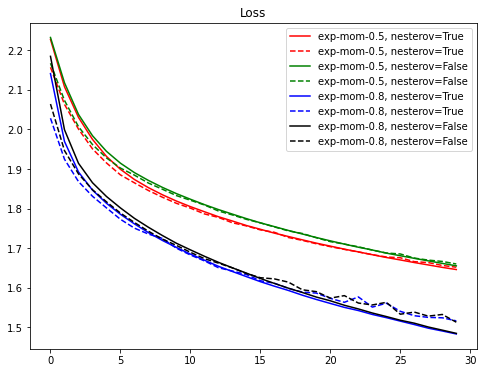

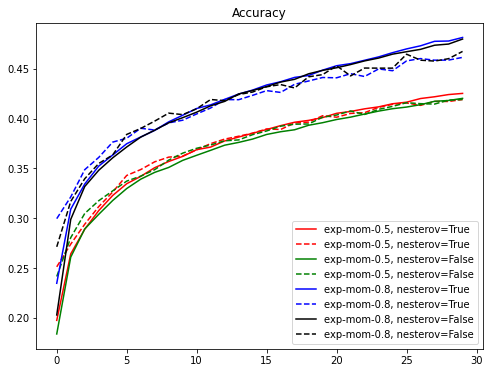

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""


color_bar = ["r", "g", "b","k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()